# Importing all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('Mall_Customers.csv')

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data.drop(columns=['CustomerID','Gender','Age'], inplace=True)

In [40]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
data_s = sc.fit_transform(data)

In [43]:
data_s

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### PCA (Dimentionality Reduction)

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)

In [46]:
pca_data = pca.fit_transform(data_s)

In [47]:
pca_data

array([[-1.53710920e+00, -9.22207047e-01],
       [-3.84167666e-01, -2.07514858e+00],
       [-2.41600197e+00,  1.06654468e-02],
       [-4.66981759e-01, -1.93835476e+00],
       [-1.45567848e+00, -8.95678311e-01],
       [-4.67442886e-01, -1.88391391e+00],
       [-2.36202224e+00,  6.46451712e-02],
       [ 5.36647757e-02, -2.35104185e+00],
       [-2.41738535e+00,  1.73988000e-01],
       [-5.23267116e-01, -1.72013023e+00],
       [-2.11542447e+00, -1.27972877e-01],
       [ 2.17909582e-01, -2.46130693e+00],
       [-2.06098362e+00, -1.28434004e-01],
       [-3.59022310e-01, -1.83039531e+00],
       [-2.11588560e+00, -7.35320262e-02],
       [-3.04120332e-01, -1.88529729e+00],
       [-1.48497398e+00, -6.50463918e-01],
       [-6.33993325e-01, -1.50144457e+00],
       [-1.59570019e+00, -4.31778261e-01],
       [ 2.98418042e-01, -2.32589649e+00],
       [-1.40400439e+00, -5.69494332e-01],
       [-3.60866817e-01, -1.61263191e+00],
       [-2.20054420e+00,  2.81025195e-01],
       [-3.

In [48]:
pca.explained_variance_ratio_

array([0.50495142, 0.49504858])

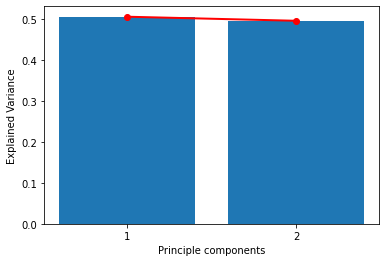

In [49]:
var = pca.explained_variance_ratio_
pc_val = np.arange(pca.n_components)+1
plt.plot(pc_val, var, 'o-', linewidth = 2 , color='r')
plt.bar(pc_val,var)
plt.xticks([1,2])
plt.xlabel('Principle components')
plt.ylabel('Explained Variance')
plt.show()

In [50]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# KMeans Clustering

In [51]:
from sklearn.cluster import KMeans

In [54]:
ks = range(1,6)
inertia = []
for k in ks:
    model= KMeans(n_clusters=k,init='k-means++' )
    model.fit(data_s)
    inertia.append(model.inertia_)

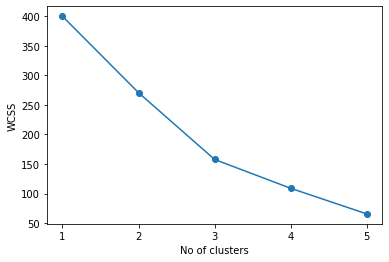

In [55]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(ks)
plt.show()

In [56]:
model_f  = KMeans(n_clusters=3)

In [57]:
label = model_f.fit_predict(data_s)

In [58]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [59]:
data_fin = pd.read_csv('Mall_Customers.csv')
data_fin['label'] = label
del data_fin['CustomerID']

In [60]:
data_fin.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [61]:
data_s = pd.DataFrame(data_s)
data_s['label']=label
data_s

,0,1,label
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


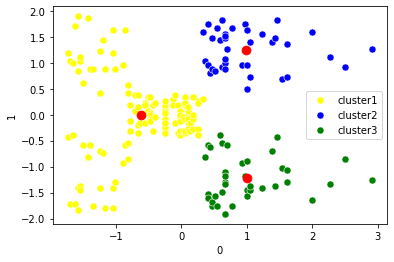

In [65]:
sns.scatterplot(x=data_s[data_s['label']==0][0], y=data_s[data_s['label']==0][1],color='yellow', label='cluster1',s=50)
sns.scatterplot(x=data_s[data_s['label']==1][0], y=data_s[data_s['label']==1][1],color='blue', label='cluster2',s=50)
sns.scatterplot(x=data_s[data_s['label']==2][0], y=data_s[data_s['label']==2][1],color='green', label='cluster3',s=50)
plt.scatter(x=model_f.cluster_centers_[:,0],y=model_f.cluster_centers_[:,1], color='r', s =75)

In [66]:
model_f.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537]])

In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(data_s.iloc[:,[0,1]],data_s['label'])

0.46658474419000145

# Hierarchical Clusterining

In [69]:
import scipy.cluster.hierarchy as sch

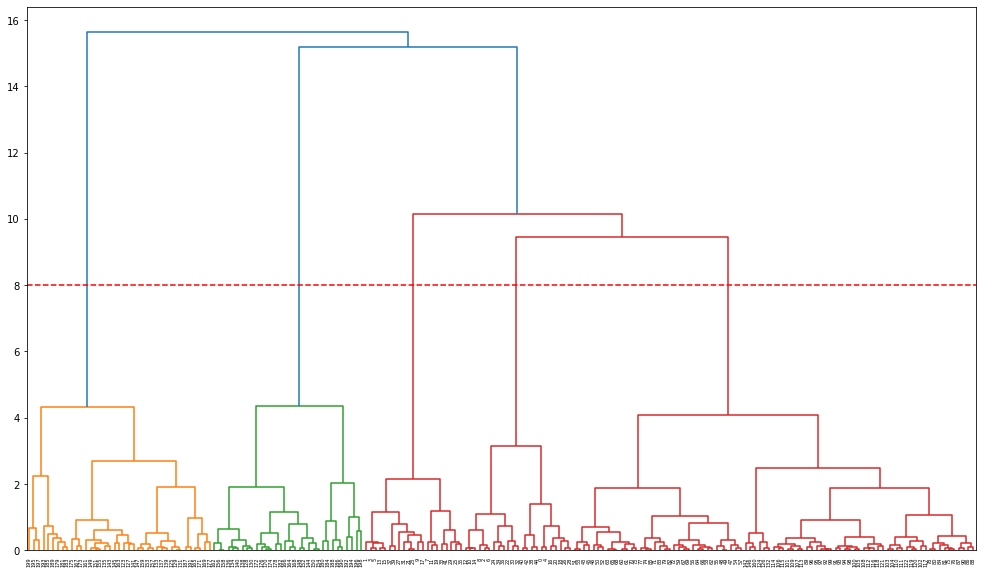

In [71]:
plt.figure(figsize=(17,10))
sch.dendrogram(sch.linkage(data_s.iloc[:,[0,1]].values, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
X = data_s.iloc[:,[0,1]]
agglo_model = AgglomerativeClustering(n_clusters=5)

In [74]:
agglo_model.fit(X)

AgglomerativeClustering(n_clusters=5)

In [75]:
X['Agglo_label'] = agglo_model.fit_predict(X)

In [76]:
X.head(20)

,0,1,Agglo_label
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
5,-1.662660,1.001596,3
6,-1.624491,-1.715913,4
7,-1.624491,1.700384,3
8,-1.586321,-1.832378,4
9,-1.586321,0.846310,3


<AxesSubplot:xlabel='0', ylabel='1'>

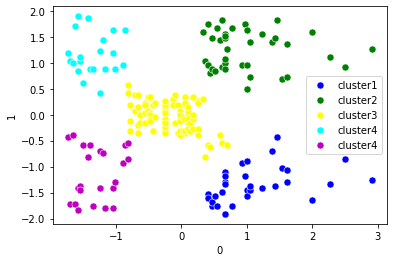

In [86]:
sns.scatterplot(x=X[X['Agglo_label']==0][0], y=X[X['Agglo_label']==0][1],color='blue', label='cluster1',s=50)
sns.scatterplot(x=X[X['Agglo_label']==1][0], y=X[X['Agglo_label']==1][1],color='green', label='cluster2',s=50)
sns.scatterplot(x=X[X['Agglo_label']==2][0], y=X[X['Agglo_label']==2][1],color='yellow', label='cluster3',s=50)
sns.scatterplot(x=X[X['Agglo_label']==3][0], y=X[X['Agglo_label']==3][1],color='cyan', label='cluster4',s=50)
sns.scatterplot(x=X[X['Agglo_label']==4][0], y=X[X['Agglo_label']==4][1],color='m', label='cluster4',s=50)

In [88]:
silhouette_score(X.iloc[:,[0,1]],X['Agglo_label'])

0.5538089226688662

# Conclusions

In [2]:
# we have different types of Customers based on AnnualIncome and Spending Score.

# (POOR CLASS)
# Customers whose income is less and spending is also less.
# Customers whose income is less but spending is more.

# (RICH CLASS)
# Customers whose income is more but spending is less.
# Customers whose income is more and spending is also more.

# (MIDDLE CLASS)
# Customers who are middle class and their spending is also middle class.